<a href="https://colab.research.google.com/github/ashishojha88/linear-assignment/blob/main/LR_Delivery_Time_Estimation_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [93]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import random

# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.feature_selection import RFE

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [158]:
# Importing the file porter_data_1.csv
orders = pd.read_csv('/content/sample_data/porter_data_1.csv')
orders.head()
#orders.shape
orders.info()
#orders.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [95]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

orders['created_at'] = pd.to_datetime(orders['created_at'])
orders['actual_delivery_time'] = pd.to_datetime(orders['actual_delivery_time'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [96]:
# Convert categorical features to category type

orders['store_primary_category'] = orders['store_primary_category'].astype('category')
orders['order_protocol'] = orders['order_protocol'].astype('category')
orders.info()
orders.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [97]:
# Calculate time taken in minutes

orders['time_taken'] = (orders['actual_delivery_time'] - orders['created_at']).dt.total_seconds() / 60
orders.head()


,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,time_taken
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44,47.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,44.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56,55.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80,59.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20,46.0


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [98]:
# Extract the hour and day of week from the 'created_at' timestamp

orders['hour'] = orders['created_at'].dt.hour
orders['day_of_week'] = orders['created_at'].dt.dayofweek
orders.head()


# Create a categorical feature 'isWeekend'
orders['isWeekend'] = orders['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
orders.head()



,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,time_taken,hour,day_of_week,isWeekend
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44,47.0,22,4,0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,44.0,21,1,0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56,55.0,0,0,0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80,59.0,3,3,0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20,46.0,2,1,0


In [99]:
# Drop unnecessary columns

orders.drop(['created_at', 'actual_delivery_time','day_of_week'], axis=1, inplace=True)
orders.head()
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 175777 non-null  float64 
 1   store_primary_category    175777 non-null  category
 2   order_protocol            175777 non-null  category
 3   total_items               175777 non-null  int64   
 4   subtotal                  175777 non-null  int64   
 5   num_distinct_items        175777 non-null  int64   
 6   min_item_price            175777 non-null  int64   
 7   max_item_price            175777 non-null  int64   
 8   total_onshift_dashers     175777 non-null  float64 
 9   total_busy_dashers        175777 non-null  float64 
 10  total_outstanding_orders  175777 non-null  float64 
 11  distance                  175777 non-null  float64 
 12  time_taken                175777 non-null  float64 
 13  hour                      175

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [100]:
# Define target variable (y) and features (X)

y = orders.pop('time_taken')
X = orders[['market_id','store_primary_category','order_protocol',
            'total_onshift_dashers','total_outstanding_orders','distance','total_busy_dashers',
            'isWeekend','hour','total_items','subtotal','num_distinct_items','min_item_price','max_item_price']]
orders.info()






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 175777 non-null  float64 
 1   store_primary_category    175777 non-null  category
 2   order_protocol            175777 non-null  category
 3   total_items               175777 non-null  int64   
 4   subtotal                  175777 non-null  int64   
 5   num_distinct_items        175777 non-null  int64   
 6   min_item_price            175777 non-null  int64   
 7   max_item_price            175777 non-null  int64   
 8   total_onshift_dashers     175777 non-null  float64 
 9   total_busy_dashers        175777 non-null  float64 
 10  total_outstanding_orders  175777 non-null  float64 
 11  distance                  175777 non-null  float64 
 12  hour                      175777 non-null  int32   
 13  isWeekend                 175

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [101]:
# Split data into training and testing sets

X_train, X_test , y_train,y_test = train_test_split(X,y, test_size=0.7, random_state=100)
X_train.info()
X_test.info()
y_train.info()
y_test.info()



<class 'pandas.core.frame.DataFrame'>
Index: 52733 entries, 167931 to 38408
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   market_id                 52733 non-null  float64 
 1   store_primary_category    52733 non-null  category
 2   order_protocol            52733 non-null  category
 3   total_onshift_dashers     52733 non-null  float64 
 4   total_outstanding_orders  52733 non-null  float64 
 5   distance                  52733 non-null  float64 
 6   total_busy_dashers        52733 non-null  float64 
 7   isWeekend                 52733 non-null  int64   
 8   hour                      52733 non-null  int32   
 9   total_items               52733 non-null  int64   
 10  subtotal                  52733 non-null  int64   
 11  num_distinct_items        52733 non-null  int64   
 12  min_item_price            52733 non-null  int64   
 13  max_item_price            52733 non-null  int6

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [102]:
# Define numerical and categorical columns for easy EDA and data manipulation


data_cat = {'Categorical': X_train[['store_primary_category', 'order_protocol']]}
# print(data_cat)




data_num = {'Numerical': X_train[['market_id','total_onshift_dashers','total_outstanding_orders','distance','total_busy_dashers',
                          'isWeekend','hour','total_items','subtotal','num_distinct_items','min_item_price',
                          'max_item_price']]}
# print(data_num)


{'Categorical':        store_primary_category order_protocol
167931                     55            3.0
75699                      57            1.0
29650                      49            5.0
113240                     38            5.0
9337                       55            5.0
...                       ...            ...
82270                      15            1.0
65615                      58            5.0
77655                       4            5.0
56088                      55            3.0
38408                       7            1.0

[52733 rows x 2 columns]}
{'Numerical':         market_id  total_onshift_dashers  total_outstanding_orders  distance  \
167931        4.0                   46.0                      55.0     18.24   
75699         4.0                   63.0                      79.0     18.84   
29650         4.0                   82.0                      82.0     18.56   
113240        4.0                   17.0                      23.0     17.00   
933

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

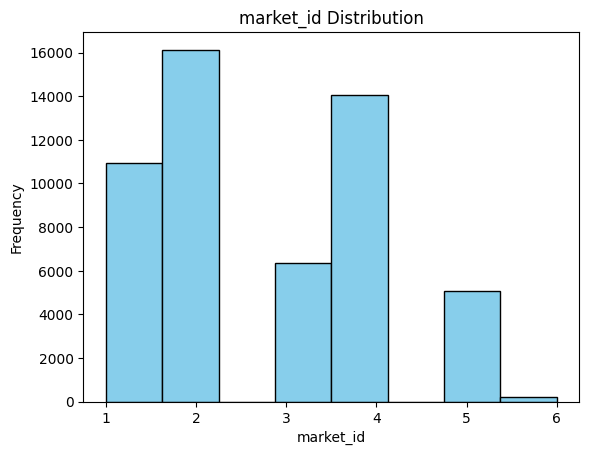

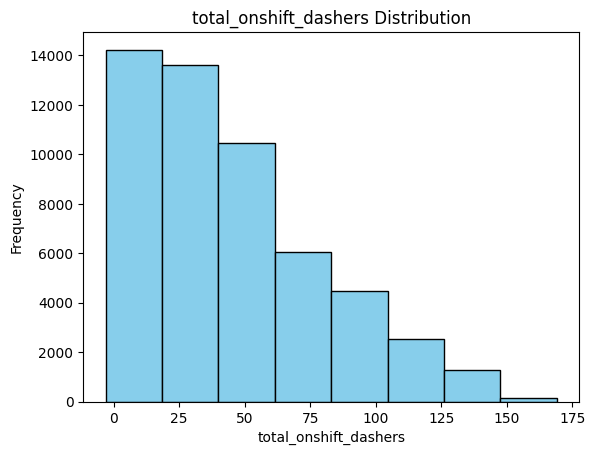

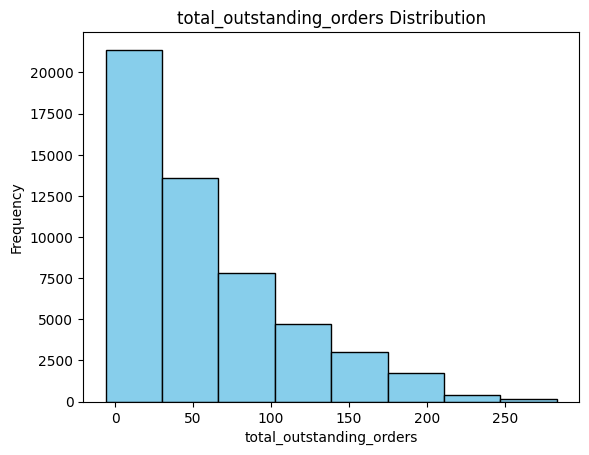

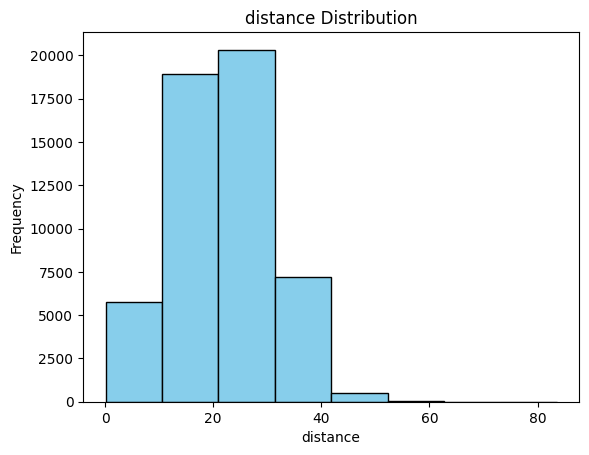

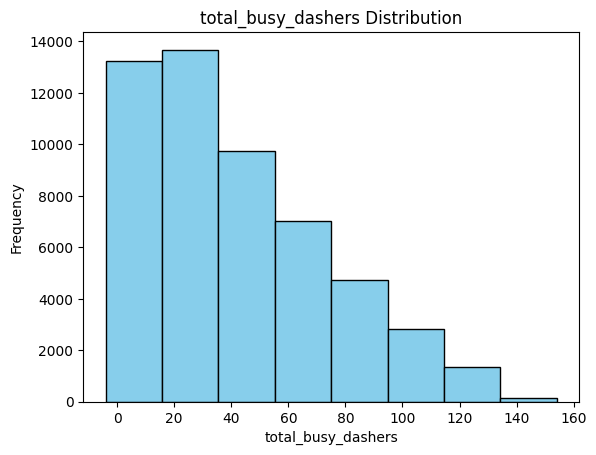

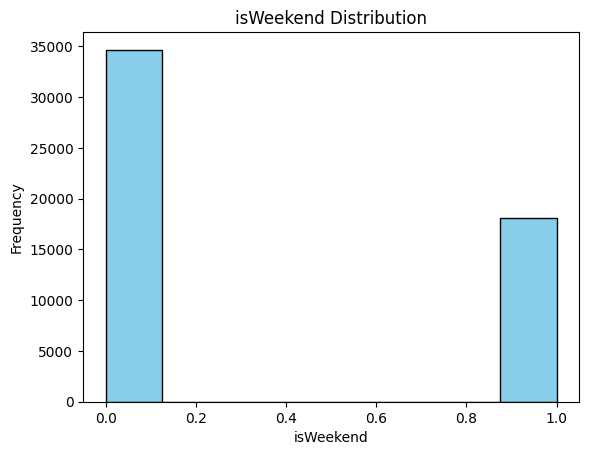

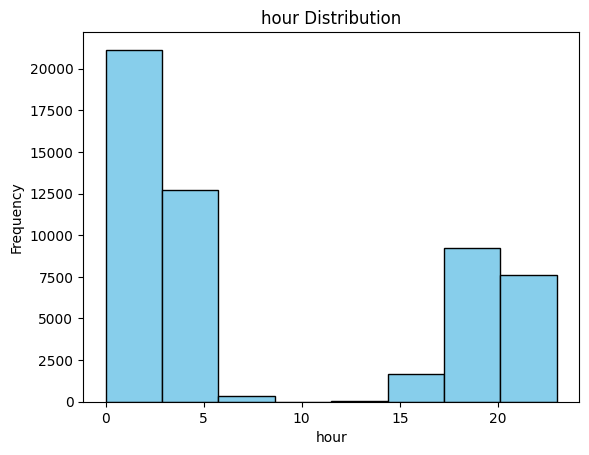

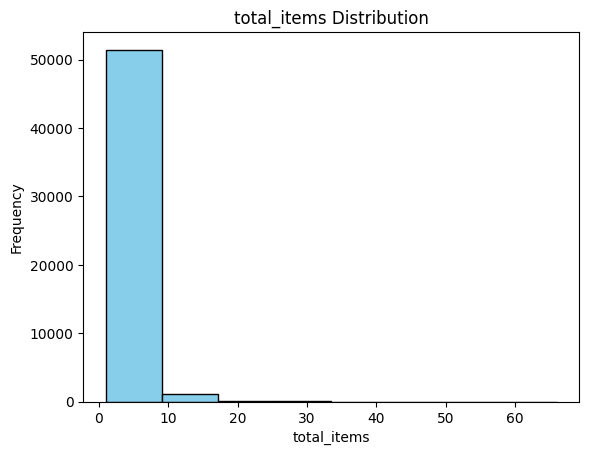

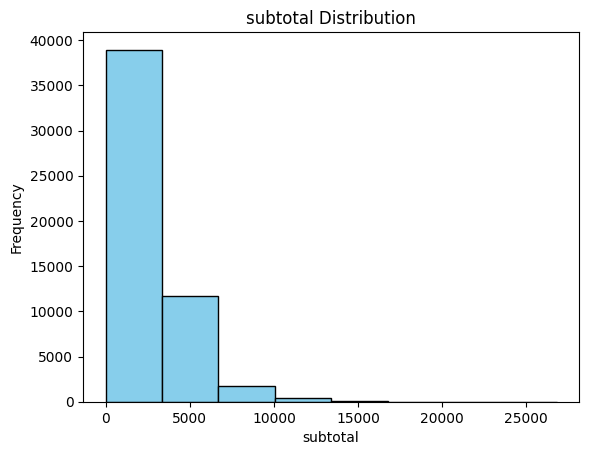

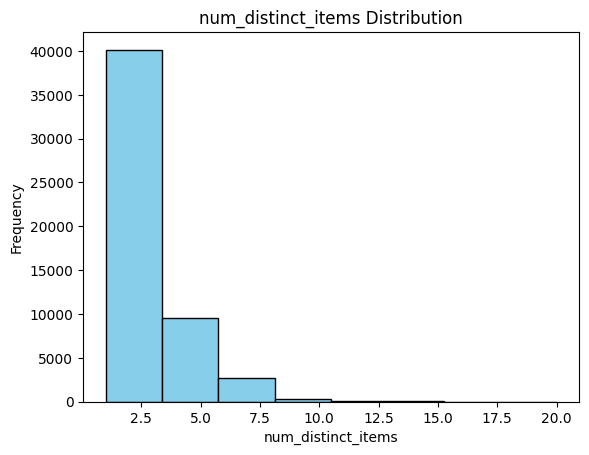

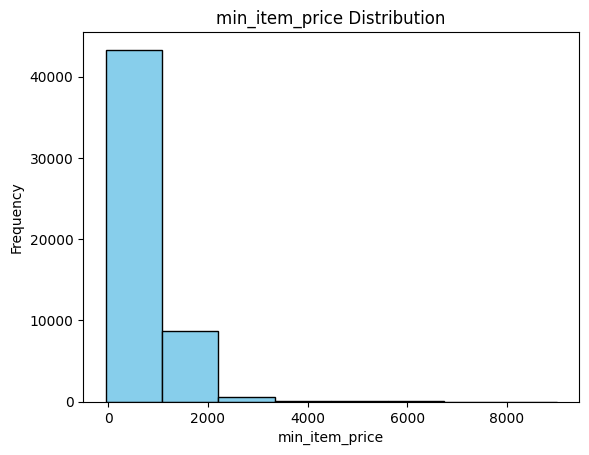

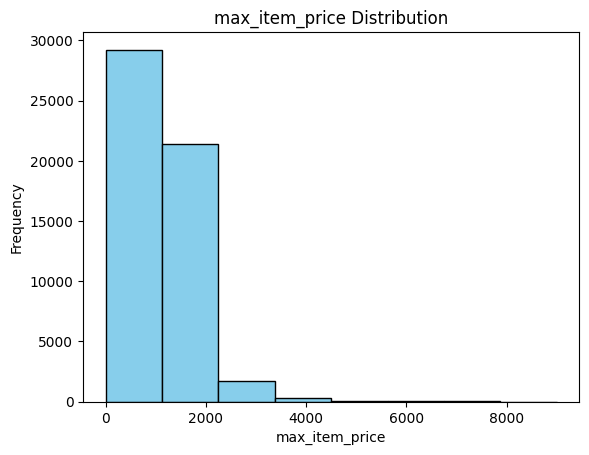

In [103]:
# Plot distributions for all numerical columns


# Create a list of index values
index_values = data_num['Numerical'].index

#Pass the index_values as index in the creation of DataFrame
df_num = pd.DataFrame(data_num['Numerical'], index=index_values)
# print(df_num)


for column in df_num.columns:
    plt.hist(df_num[column], bins=8, color='skyblue', edgecolor='black')
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

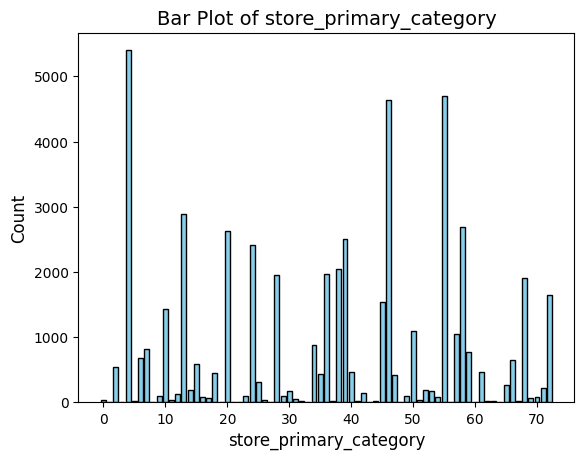

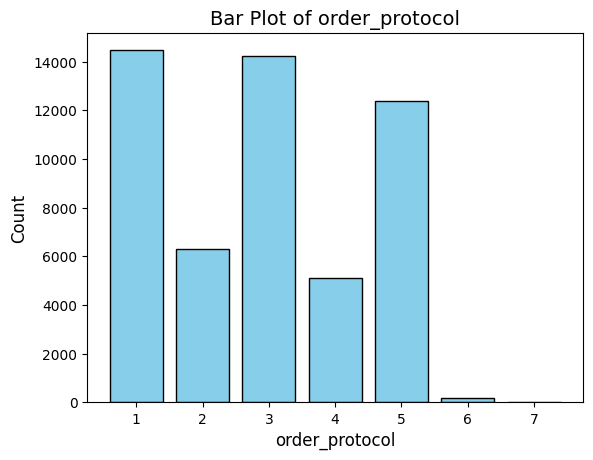

In [104]:
# Distribution of categorical columns

# Create a list of index values
index = data_cat['Categorical'].index

#Pass the index_values as index in the creation of DataFrame
df_cat = pd.DataFrame(data_cat['Categorical'], index=index)
# print(df_cat)

# Count the occurrences of each category
for column in df_cat.columns:
    counts = df_cat[column].value_counts()

    # Plot the bar chart for each column
    plt.bar(counts.index, counts.values, color='skyblue', edgecolor='black')
    plt.title(f'Bar Plot of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

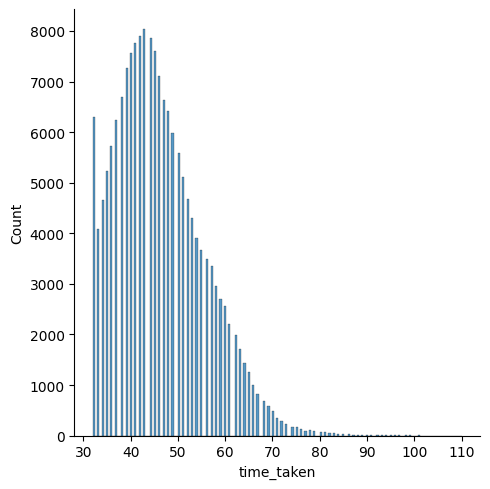

In [105]:
# Distribution of time_taken

dff = pd.DataFrame(y)
sns.displot(dff, x='time_taken')
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features

sns.pairplot(orders,x_vars=['market_id','store_primary_category','order_protocol',
            'total_onshift_dashers','total_outstanding_orders','distance','total_busy_dashers',
            'isWeekend','hour','total_items','subtotal','num_distinct_items','min_item_price','max_item_price'],
             y_vars=y, height=4, aspect=1, kind='scatter')
plt.show()

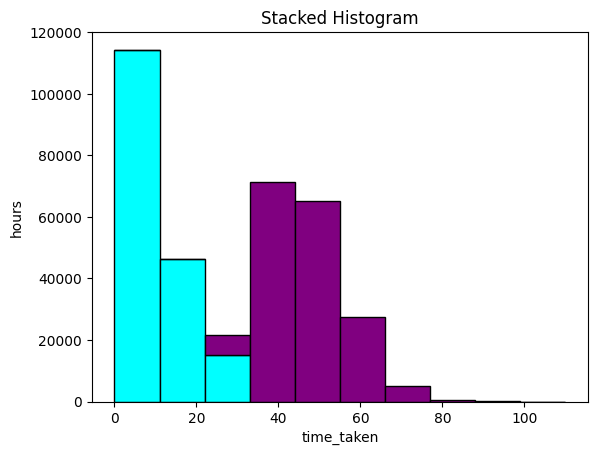

In [106]:
# Show the distribution of time_taken for different hours


# Creating a stacked histogram
plt.hist([X['hour'],y],  stacked=True, color=['cyan', 'Purple'], edgecolor='black')

# Adding labels and title
plt.xlabel('time_taken')
plt.ylabel('hours')
plt.title('Stacked Histogram')

# Display the plot
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

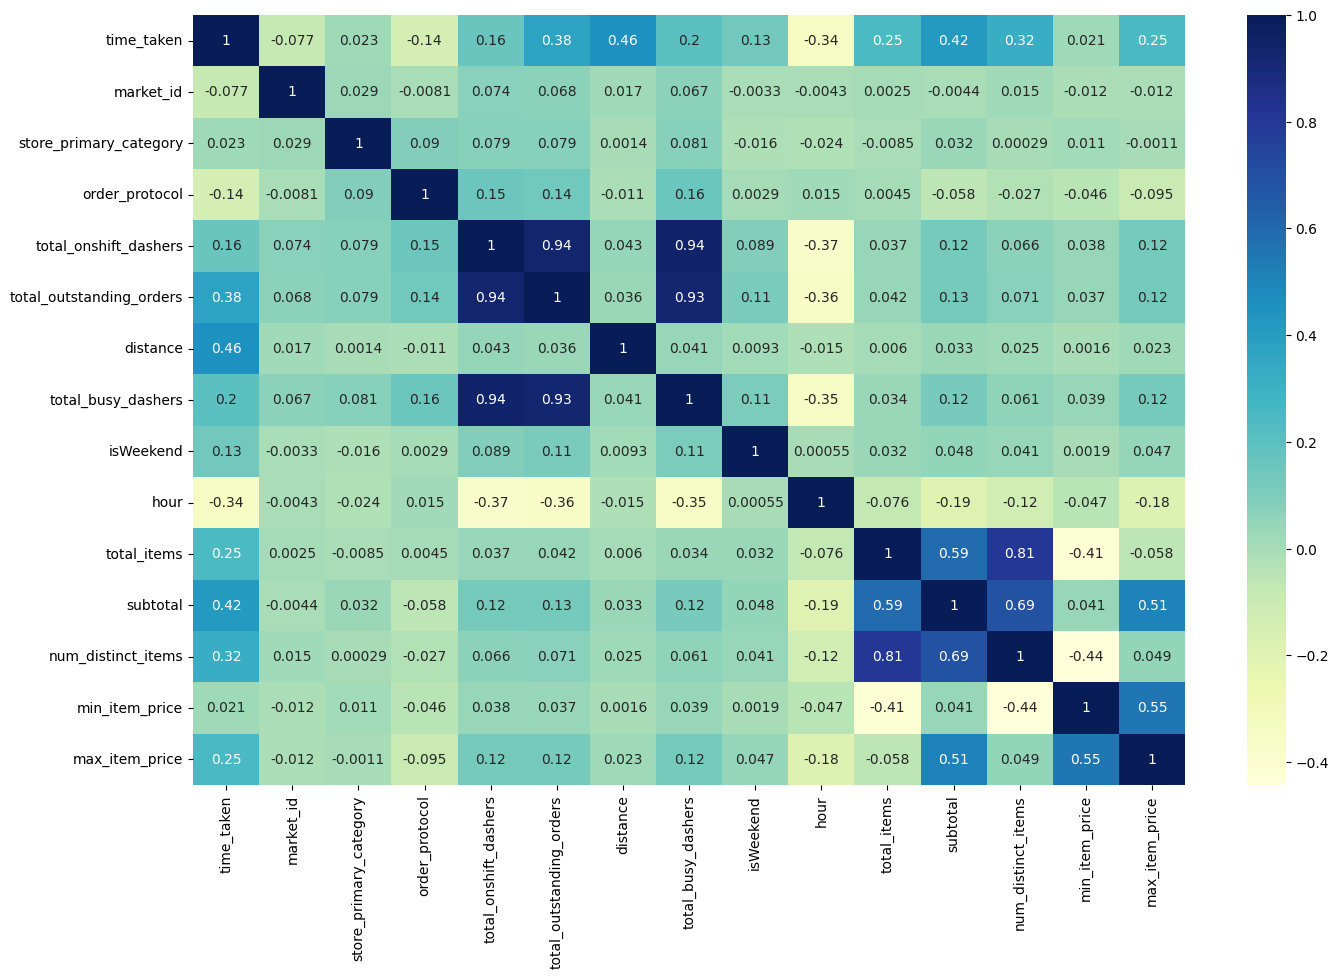

In [107]:
# Plot the heatmap of the correlation matrix

X_train.insert(0, 'time_taken', y)
plt.figure(figsize = (16,10))
sns.heatmap(X_train.corr(),annot = True ,cmap = "YlGnBu")
plt.show()



##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [108]:
# Drop 3-5 weakly correlated columns from training dataset

X_train.drop(['order_protocol','hour','market_id'], axis=1, inplace=True)
X_train.head()

,time_taken,store_primary_category,total_onshift_dashers,total_outstanding_orders,distance,total_busy_dashers,isWeekend,total_items,subtotal,num_distinct_items,min_item_price,max_item_price
167931,43.0,55,46.0,55.0,18.24,44.0,0,3,3725,3,1125,1350
75699,37.0,57,63.0,79.0,18.84,62.0,0,1,925,1,925,925
29650,36.0,49,82.0,82.0,18.56,74.0,0,3,2197,3,399,999
113240,39.0,38,17.0,23.0,17.00,17.0,0,2,2728,2,1129,1599
9337,32.0,55,55.0,58.0,8.96,49.0,0,2,2485,2,895,1295


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

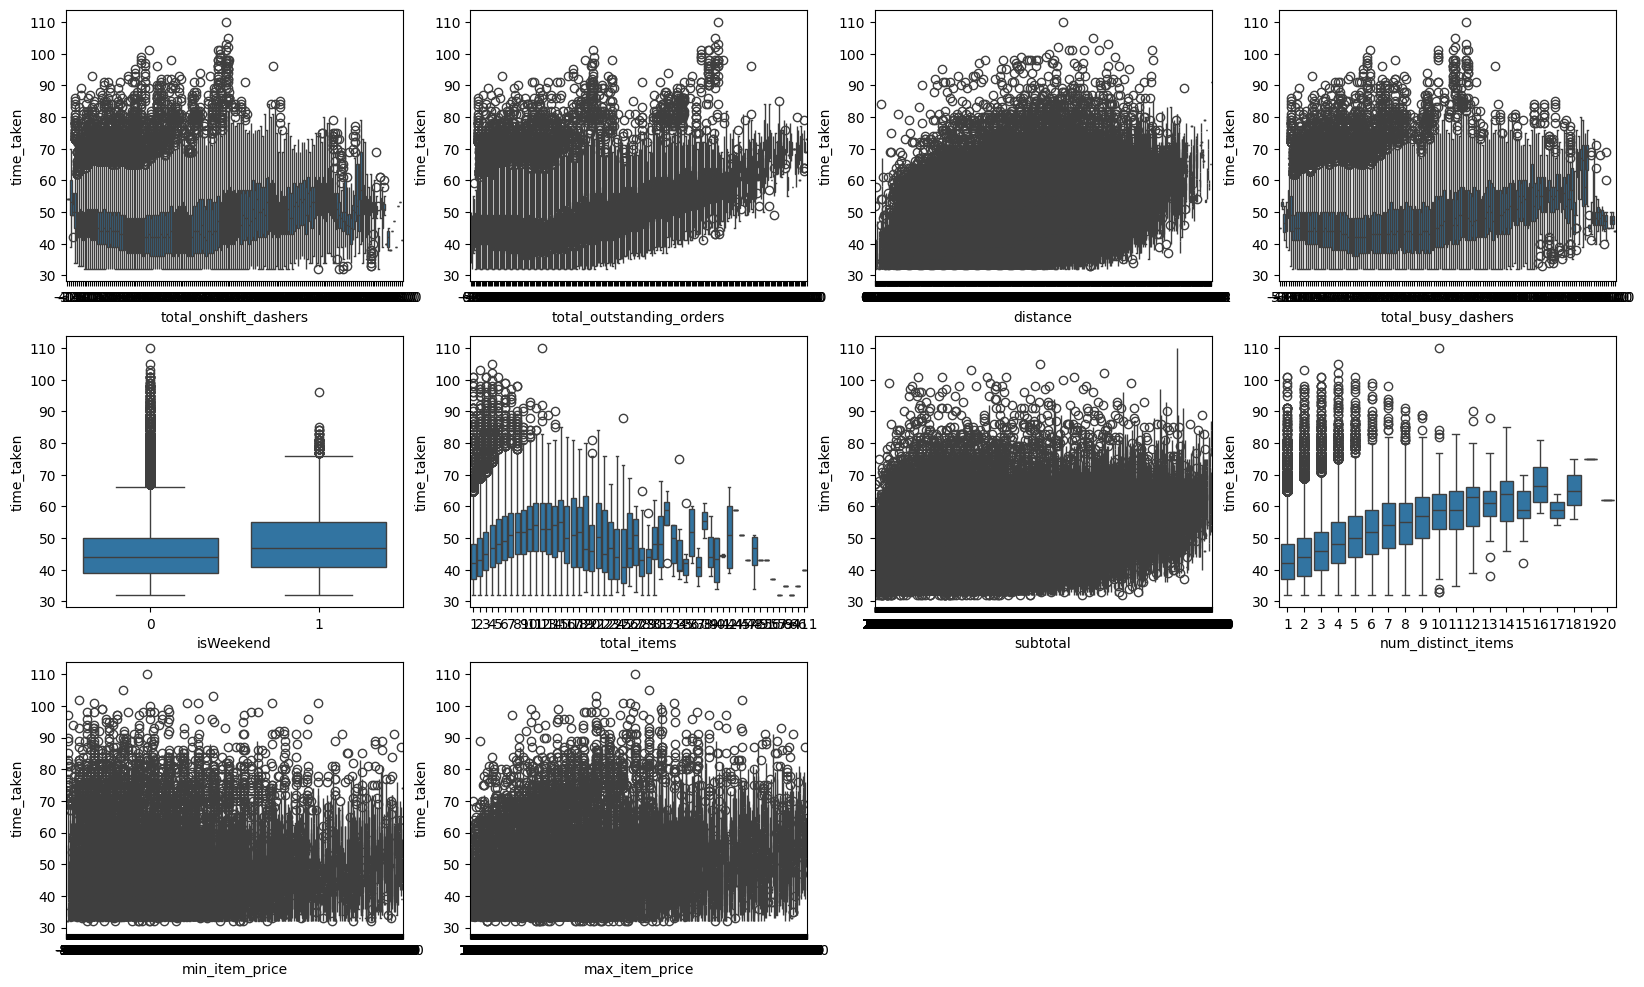

In [109]:
# Boxplot for time_taken

# print(X_train)

plt.figure(figsize=(20, 12))

plt.subplot(3,4,1)
sns.boxplot(x = 'total_onshift_dashers', y = y, data = orders)

plt.subplot(3,4,2)
sns.boxplot(x = 'total_outstanding_orders', y = y, data = orders)

plt.subplot(3,4,3)
sns.boxplot(x = 'distance', y = y, data = orders)

plt.subplot(3,4,4)
sns.boxplot(x = 'total_busy_dashers', y = y, data = orders)

plt.subplot(3,4,5)
sns.boxplot(x = 'isWeekend', y = y, data = orders)

plt.subplot(3,4,6)
sns.boxplot(x = 'total_items', y = y, data = orders)

plt.subplot(3,4,7)
sns.boxplot(x = 'subtotal', y = y, data = orders)

plt.subplot(3,4,8)
sns.boxplot(x = 'num_distinct_items', y = y, data = orders)

plt.subplot(3,4,9)
sns.boxplot(x = 'min_item_price', y = y, data = orders)

plt.subplot(3,4,10)
sns.boxplot(x = 'max_item_price', y = y, data = orders)

plt.show()


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [ ]:
# Handle outliers





## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation




#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [128]:
# Import libraries
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [129]:
# Apply scaling to the numerical columns

#X_train.pop('time_taken')
# X_train.head()
# X_train.info()
# X_train.describe()
scaler = MinMaxScaler()
num_vars = ['total_onshift_dashers','total_outstanding_orders','distance','total_busy_dashers',
            'isWeekend','total_items','subtotal','num_distinct_items','min_item_price','max_item_price']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train[num_vars].describe()
X_train.head()
# store_primary_category

,time_taken,store_primary_category,total_onshift_dashers,total_outstanding_orders,distance,total_busy_dashers,isWeekend,total_items,subtotal,num_distinct_items,min_item_price,max_item_price
167931,43.0,55,0.284884,0.211073,0.217266,0.303797,0.0,0.030769,0.138993,0.105263,0.130041,0.150017
75699,37.0,57,0.383721,0.294118,0.224460,0.417722,0.0,0.000000,0.034515,0.000000,0.107944,0.102789
29650,36.0,49,0.494186,0.304498,0.221103,0.493671,0.0,0.030769,0.081978,0.105263,0.049829,0.111012
113240,39.0,38,0.116279,0.100346,0.202398,0.132911,0.0,0.015385,0.101791,0.052632,0.130483,0.177686
9337,32.0,55,0.337209,0.221453,0.105995,0.335443,0.0,0.015385,0.092724,0.052632,0.104629,0.143905


Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [130]:
# Create/Initialise the model

X_train_sm1 = sm.add_constant(X_train['distance'])
X_train_sm1.head()

,const,distance
167931,1.0,0.217266
75699,1.0,0.224460
29650,1.0,0.221103
113240,1.0,0.202398
9337,1.0,0.105995


In [131]:
# Train the model using the training data
# First iteration of the model

lr1 = sm.OLS(y_train,X_train_sm1).fit()
print(lr1.summary())
lr1.params

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                 1.396e+04
Date:                Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                        11:40:53   Log-Likelihood:            -1.8617e+05
No. Observations:               52733   AIC:                         3.724e+05
Df Residuals:                   52731   BIC:                         3.724e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.6172      0.096    370.786      0.0

,0
const,35.617155
distance,40.459885


In [132]:
# Make predictions
predictions1 = lr1.predict(X_train_sm1)
predictions1.head()

,0
167931,44.407720
75699,44.698798
29650,44.562961
113240,43.806158
9337,39.905708


In [133]:
# Find results for evaluation metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm1.values, i) for i in range(X_train_sm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

print(lr1.summary())
print(vif)



                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                 1.396e+04
Date:                Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                        11:41:14   Log-Likelihood:            -1.8617e+05
No. Observations:               52733   AIC:                         3.724e+05
Df Residuals:                   52731   BIC:                         3.724e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.6172      0.096    370.786      0.0

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [145]:
# Loop through the number of features and test the model

# 2nd Iteration of the model

X_train_sm2 = sm.add_constant(X_train[['distance','subtotal']])
lr2 = sm.OLS(y_train,X_train_sm2).fit()
# print(lr2.summary())
# lr2.params

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm2.values, i) for i in range(X_train_sm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

# 3rd Iteration of the model
X_train_sm3 = sm.add_constant(X_train[['distance','subtotal','total_outstanding_orders']])
lr3 = sm.OLS(y_train,X_train_sm3).fit()
# print(lr3.summary())
# lr3.params

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm3.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm3.values, i) for i in range(X_train_sm3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)



# 4th Iteration of the model
X_train_sm4 = sm.add_constant(X_train[['distance','subtotal','total_outstanding_orders','num_distinct_items']])
lr4 = sm.OLS(y_train,X_train_sm4).fit()
# print(lr4.summary())
# lr4.params

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm4.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm4.values, i) for i in range(X_train_sm4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)


# 5th Iteration of the model
X_train_sm5 = sm.add_constant(X_train[['distance','subtotal','total_outstanding_orders','num_distinct_items',
                                       'max_item_price']])
lr5 = sm.OLS(y_train,X_train_sm5).fit()
# print(lr5.summary())
# lr5.params

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm5.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm5.values, i) for i in range(X_train_sm5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

# print(lr5.summary())
# print(vif)

# 6th Iteration of the model
X_train_sm6 = sm.add_constant(X_train[['distance','subtotal','total_outstanding_orders','num_distinct_items',
                                       'max_item_price','total_items']])
lr6 = sm.OLS(y_train,X_train_sm6).fit()
# print(lr5.summary())
# lr5.params

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm6.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm6.values, i) for i in range(X_train_sm6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

# print(lr6.summary())
# print(vif)


# 7th Iteration of the model
X_train_sm7 = sm.add_constant(X_train[['distance','subtotal','total_outstanding_orders','num_distinct_items',
                                       'max_item_price','total_items','total_busy_dashers']])
lr7 = sm.OLS(y_train,X_train_sm7).fit()
# print(lr5.summary())
# lr5.params

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm7.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm7.values, i) for i in range(X_train_sm7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

# print(lr7.summary())
# print(vif)


# 8th Iteration of the model
X_train_sm8 = sm.add_constant(X_train[['distance','subtotal','total_outstanding_orders','num_distinct_items',
                                       'max_item_price','total_items','total_busy_dashers',
                                       'total_onshift_dashers']])
lr8 = sm.OLS(y_train,X_train_sm8).fit()
# print(lr5.summary())
# lr5.params

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm8.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm8.values, i) for i in range(X_train_sm8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

# print(lr8.summary())
# print(vif)


# 9th Iteration of the model
X_train_sm9 = sm.add_constant(X_train[['distance','subtotal','total_outstanding_orders','num_distinct_items',
                                       'max_item_price','total_items','total_busy_dashers',
                                       'total_onshift_dashers','isWeekend']])
lr9 = sm.OLS(y_train,X_train_sm9).fit()
# print(lr5.summary())
# lr5.params

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm9.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm9.values, i) for i in range(X_train_sm9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

print(lr9.summary())
print(vif)




                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                 2.583e+04
Date:                Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                        12:23:37   Log-Likelihood:            -1.4786e+05
No. Observations:               52733   AIC:                         2.957e+05
Df Residuals:                   52723   BIC:                         2.958e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [155]:
# Build the final model with selected number of features


X_train_smf = sm.add_constant(X_train[['distance','subtotal','total_outstanding_orders','total_busy_dashers',
                                       'total_onshift_dashers']])
lrf = sm.OLS(y_train,X_train_smf).fit()
# print(lr4.summary())
# lr4.params

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_smf.columns
vif['VIF'] = [variance_inflation_factor(X_train_smf.values, i) for i in range(X_train_smf.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)


print(lrf.summary())
print(vif)




                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                 4.391e+04
Date:                Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                        12:32:24   Log-Likelihood:            -1.4908e+05
No. Observations:               52733   AIC:                         2.982e+05
Df Residuals:                   52727   BIC:                         2.982e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

167931    44.547235
75699     39.474694
29650     34.387795
113240    44.843579
9337      34.969786
            ...    
82270     39.939905
65615     41.496793
77655     40.327911
56088     48.492916
38408     41.280474
Length: 52733, dtype: float64


<ipython-input-157-db6c434c78ee>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_time_taken), bins = 20)


Text(0.5, 0, 'Errors')

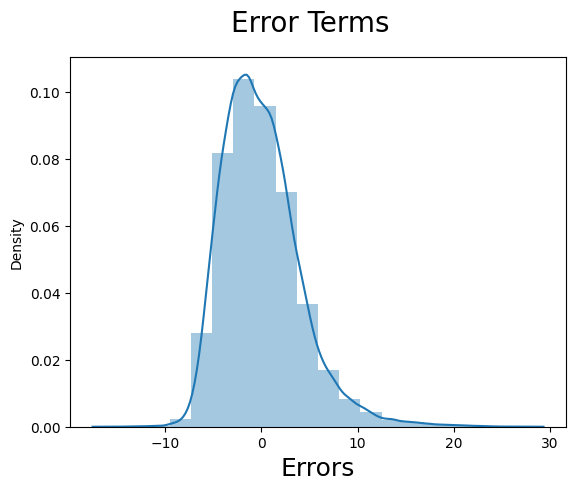

In [157]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogramd

y_train_time_taken = lrf.predict(X_train_smf)
print(y_train_time_taken)


fig = plt.figure()
sns.distplot((y_train - y_train_time_taken), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)



```
# This is formatted as code
```

[Your inferences here:] It looks like error terms are unformly distributed to gauge the best fit line.



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [ ]:
# Compare the scaled vs unscaled features used in the final model



Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'



Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>

There are categorical variables but they have very less impact on time_taken for delivery. So, in my final model, we have skipped them based on correlation that we observed through heatmap.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>0.2 refers to 20% of data would be used to train model and 80% to test.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>

Distance variable



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>

Using boxplot visualization for all the variables (features) against time_taken(target variable).



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>

Distance, sub_total & No. of outstanding orders.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>


Continuous distribution between target and feature variables and identifying best regression line fitting the linear equation (assuming various consideration mainly error terms).

```
# This is formatted as code
```





---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>

Simple Reg- No of independent variable is one.
Multiple Reg - No of independent variable is more than one.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>


Cost function helps in identifying best fit regression line by minimizing the data discrepancy using RSS (Ordinary Least Squares Method). It can be done through either Differentiation or Gradient Descent methods.



---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>

Overfit model makes poor prediction on test data but provides best result in training data.

Underfitting model doesn't make good prediction even on training data.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Helps in identifying the error terms distribution which is major assumption for linear regression model.